### Задание 1
### Построение круговой диаграммы 
Выполните построение круговой диаграммы по данным файла Electric_Сars.csv, содержащим сведения о моделях электромобилей.

Для построения диаграммы:

1.	Сформируйте данные по количеству моделей (столбец Brand) и выполните их сортировку по столбцу TopSpeed_KmH.

2.	Используйте библиотеку matplotlib, чтобы построить круговую диаграмму по полученным в первом пункте данным. Диаграмма должна показывать долю в процентном отношении первых 5 и всех остальных моделей (rest). 

3.	Покажите на диаграмме наименование брендов и соответствующую им долю в процентах.

4.	Увеличьте радиус диаграммы в 3 раза.

5.	Сохраните график под именем auto_pie.png.

Как должно получиться:

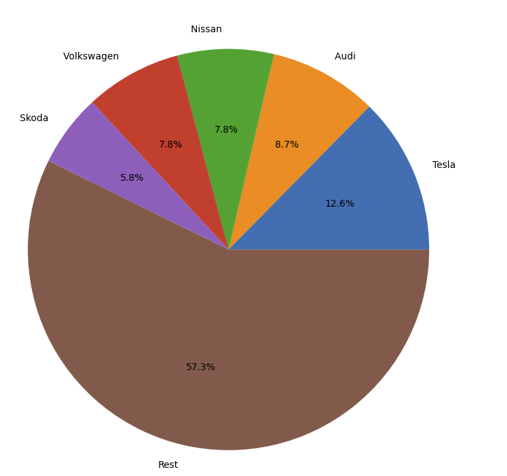

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Electric_car.csv')

In [9]:
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


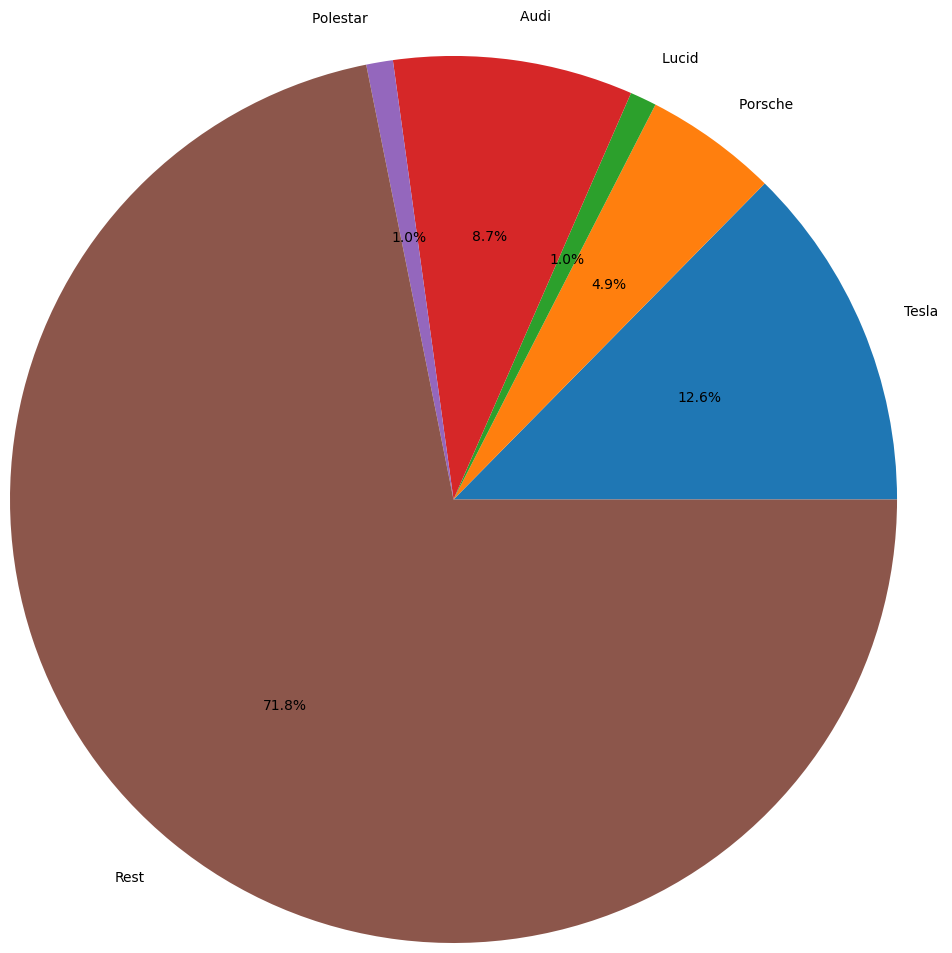

In [15]:
# данные: количество моделей и макс. скорость
data = df.groupby("Brand").agg(
    Count=("Brand", "size"),
    TopSpeed_KmH=("TopSpeed_KmH", "max")
).sort_values("TopSpeed_KmH", ascending=False)

# топ-5 + rest
top5 = data.head(5).reset_index()[["Brand", "Count"]]
rest = pd.DataFrame({"Brand": ["Rest"], "Count": [data["Count"].iloc[5:].sum()]})
final = pd.concat([top5, rest])


# круговая диаграмма (matplotlib, но с цветами sns)
plt.pie(
    final["Count"],
    labels=final["Brand"],
    autopct="%1.1f%%",
    radius=3
)

plt.savefig("auto_pie.png", bbox_inches="tight")
plt.show()

### Задание 2
### Построение столбчатой диаграммы
Постройте горизонтальную столбчатую диаграмму по данным файла Electric_Сars.csv, который содержит сведения о моделях электромобилей.

Для построения диаграммы:

1.	Сформируйте данные по количеству различных моделей (столбец Brand) и выполните сортировку по количеству.

2.	Используйте библиотеку matplotlib, чтобы построить горизонтальную столбчатую диаграмму по данным из первого пункта.

3.	При построении диаграммы укажите наименование модели и соответствующее ей количество.

4.	Сохраните график под именем saved_figure_barh.png.

Как должно получиться:

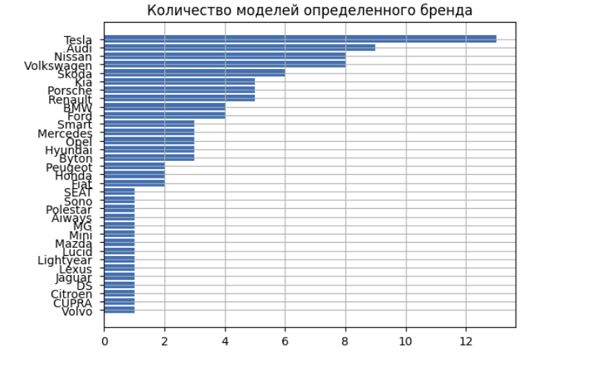

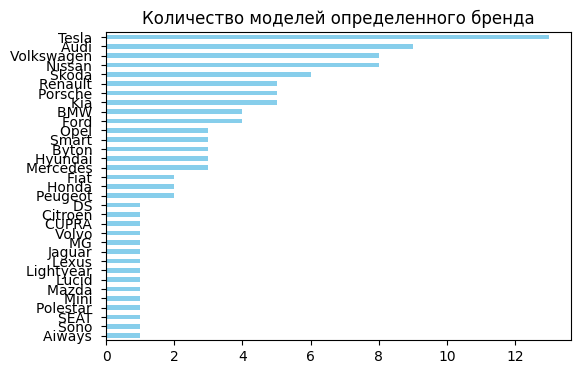

In [39]:
# сформировываем данные по количеству разных моделей
df = pd.read_csv('Electric_car.csv')
df = df.groupby('Brand').size().sort_values()

# строим столбчатую диаграмму
plt.figure(figsize=(6, 4))
df.plot(kind='barh', color='skyblue')
plt.title('Количество моделей определенного бренда')
plt.ylabel('')

# сохраняем график
plt.savefig('saved_figure_barh.png', bbox_inches='tight')
plt.show()

### Задание 3
### Построение и визуализация 3D-цилиндра
Напишите программу для построения и визуализации 3D-цилиндра с помощью библиотеки matplotlib.

Шаги выполнения задания:

1.	Сформируйте вершины для построения цилиндра из 20 угловых секторов. Сначала постройте вершины одного основания (круга) — используйте углы поворота и радиус окружности равный 1.

Координаты вершин основания определяются по формуле:

$0,cos(2*pi*(i)/N),sin(2*pi*(i)/N),$
где выражение $(2*pi*(i)/N)$ задает углы поворота на каждом шаге i.

2.	Аналогично постройте вершины второго основания, взяв высоту равную 1. Координаты вершин основания можно найти по формуле:

$1,cos(2*pi*(i)/N),sin(2*pi*(i)/N)$
3.	Используйте библиотеку spatial, чтобы сформировать грани для построения цилиндра из 20 угловых секторов. 

4.	Создайте сетку для построения цилиндра. 

5.	Визуализируйте полученный цилиндр.

6.	Сохраните изображение в формате stl.

Как должно получиться:

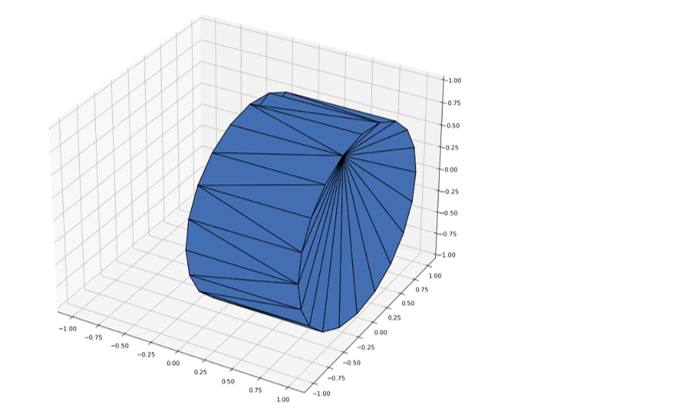

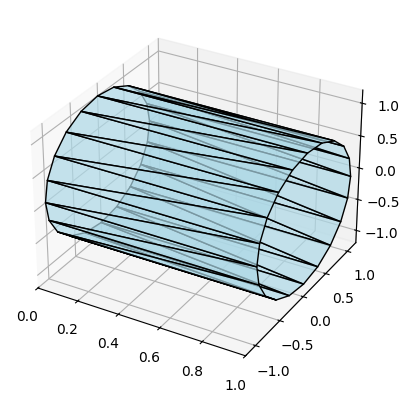

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

N = 20  # угловых секторов

# Вершины
vertices = []
for i in range(N):
    angle = 2 * np.pi * i / N
    vertices.append([0, np.cos(angle), np.sin(angle)])  # нижнее основание
    vertices.append([1, np.cos(angle), np.sin(angle)])  # верхнее основание

vertices = np.array(vertices)

# Грани
faces = []
for i in range(0, 2*N, 2):
    next_i = (i + 2) % (2*N)
    faces.append([i, next_i, i+1])      # треугольник 1
    faces.append([next_i, next_i+1, i+1])  # треугольник 2

# Визуализация
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

poly3d = Poly3DCollection([vertices[face] for face in faces],
                         alpha=0.7, facecolors='lightblue', edgecolors='black')
ax.add_collection3d(poly3d)

ax.set_xlim([0, 1])
ax.set_ylim([-1.2, 1.2])
ax.set_zlim([-1.2, 1.2])
plt.show()

# Сохранение STL
with open("cylinder.stl", "w") as f:
    f.write("solid cylinder\n")
    for face in faces:
        v1, v2, v3 = vertices[face]
        normal = np.cross(v2-v1, v3-v1)
        normal /= np.linalg.norm(normal)
        f.write(f"facet normal {normal[0]:.6f} {normal[1]:.6f} {normal[2]:.6f}\n")
        f.write("outer loop\n")
        f.write(f"vertex {v1[0]:.6f} {v1[1]:.6f} {v1[2]:.6f}\n")
        f.write(f"vertex {v2[0]:.6f} {v2[1]:.6f} {v2[2]:.6f}\n")
        f.write(f"vertex {v3[0]:.6f} {v3[1]:.6f} {v3[2]:.6f}\n")
        f.write("endloop\nendfacet\n")
    f.write("endsolid cylinder\n")